<a href="https://colab.research.google.com/github/raymondkim777/JobListingDataAnalysis/blob/main/Data_Analysis_LR_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloading & Installing Kaggle

In [ ]:
'''
!pip install kaggle
from google.colab import files
files.upload()
'''

'\n!pip install kaggle\nfrom google.colab import files\nfiles.upload()\n'

In [ ]:
'''
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/Work/Projects/Data_Analysis/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle'''

'\n!mkdir -p ~/.kaggle\n!cp /content/drive/MyDrive/Work/Projects/Data_Analysis/kaggle.json ~/.kaggle/\n!chmod 600 ~/.kaggle/kaggle.json\n!ls ~/.kaggle'

In [ ]:
# !kaggle datasets download -d shivamb/real-or-fake-fake-jobposting-prediction

In [ ]:
# !ls
# !unzip  real-or-fake-fake-jobposting-prediction.zip

#Data Manipulation

Creating DataFrame sampling 1400 job listings (true/false)

In [ ]:
import pandas as pd

file = "./drive/MyDrive/Work/Projects/Data_Analysis/fake_job_postings.csv"
df = pd.read_csv(file)
# df.info()

# print(pd.isna(df))
df.fillna(0, inplace=True)
# print(pd.isna(df))
# df.corr()
# df.describe()
col = df.columns
col

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [ ]:
df2 = df.loc[:, [col[1], col[5], col[6], col[7], col[17]]]
df2 = df2.drop(df2.loc[df2.loc[:, 'requirements'] == 0].index, axis='index')
df2 = df2.drop(df2.loc[df2.loc[:, 'requirements'] == 0].index, axis='index')
df2 = df2.loc[df2.loc[:, 'description'].str.strip().str.len() > 0]

df2['profile_yn'] = df2.loc[:, 'company_profile'].apply(lambda x: 1 if x != 0 else 0)
col2 = df2.columns
df2 = df2.loc[:, [col2[0], col2[2], col2[3], col2[4], col2[5]]]

df_t = df2.loc[df2.loc[:, col2[-2]] == 0]
df_f = df2.loc[df2.loc[:, col2[-2]] == 1]

df_t = df_t.sample(n=700, replace=False)
df_f = df_f.sample(n=700, replace=False)

sample_df = pd.concat([df_t, df_f], ignore_index=True)
sample_df

<ipython-input-87-92e3b1857c3e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['profile_yn'] = df2.loc[:, 'company_profile'].apply(lambda x: 1 if x != 0 else 0)


,title,description,requirements,fraudulent,profile_yn
0,Homebased Inbound Customer Service Representative,- Work from home anywhere in New Zealand! - St...,- Proven experience in a call centre position ...,0,1
1,WF14 0DQ Horticulture Retail Apprenticeship Un...,Due to government funding you must be 16-18 ye...,16-18 year olds only due to government funding...,0,1
2,Licensed Practical Nurse - Part-time (Seneca C...,"Crossroads Treatment Centers in Seneca, SC is ...",Qualifications include: A positive attitude an...,0,1
3,Leighton Buzzard DGV Apprenticeship available ...,Government funding is only available for 16-18...,This is fantastic opportunity for someone want...,0,1
4,SEO Consultant,The SEO Consultant will be the fully rounded S...,KEY SKILLS:Minimum 3/4 years SEO exposure in a...,0,1
...,...,...,...,...,...
1395,Network Marketing,"Are you looking to make anywhere from 600-115,...","An ambition to succeed, A desire to be the bes...",1,0
1396,Remote Admin Clerk,We are seeking individuals to be connected wit...,Home Office SuppliesComputer with internet acc...,1,0
1397,Manufacturing Engineer,"Engineering: 100% Employee Owned Windings, Inc...",Qualified applicants should have a BS Manufact...,1,0
1398,"Account Sales Managers $80-$130,000/yr",We provide No Credit Check Financing to custom...,Experience and Skills Required- Minimum of 3 ...,1,1


Opening stopword file

In [ ]:
#!pip install nltk
import nltk
nltk.download('wordnet')

!wget https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
gist_file = open("gist_stopwords.txt", "r")
try:
    content = gist_file.read()
    stopwords_list = content.split(",")
finally:
    gist_file.close()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


--2023-12-29 13:07:28--  https://gist.githubusercontent.com/ZohebAbai/513218c3468130eacff6481f424e4e64/raw/b70776f341a148293ff277afa0d0302c8c38f7e2/gist_stopwords.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6271 (6.1K) [text/plain]
Saving to: ‘gist_stopwords.txt.1’

gist_stopwords.txt. 100%[===================>]   6.12K  --.-KB/s    in 0s      

2023-12-29 13:07:28 (21.3 MB/s) - ‘gist_stopwords.txt.1’ saved [6271/6271]



Removing stopwords & nonsensical words, saving remaining words into list

In [ ]:
from nltk.corpus import wordnet

cols = ['title', 'description', 'requirements']

def check_word(word):
  return len(wordnet.synsets(word)) > 0

def remove_non_alpha(word, word_list):
  new_word = word
  for i in range(len(word)):
    if not word[i].isalpha():
      new_word = word[:i]
      rest = word[i + 1:]
      if rest != "":
        word_list.append(rest)
      break
  if check_word(new_word):
    return new_word
  return None

def remove_stop(word_list):
  i = 0
  while i < len(word_list):
    word_list[i] = remove_non_alpha(word_list[i], word_list)
    if word_list[i] is None or word_list[i] == "" or word_list[i] in stopwords_list:
      del word_list[i]
    else:
      i += 1

for idx, r in sample_df.iterrows():
  for c in cols:
    word_list = r[c].lower().split()
    remove_stop(word_list)
    sample_df.at[idx, c] = word_list

sample_df

,title,description,requirements,fraudulent,profile_yn
0,"[inbound, customer, service, representative]","[work, zealand, starting, hours, week, late, e...","[proven, experience, centre, position, excelle...",0,1
1,"[horticulture, retail, apprenticeship, nas, ye...","[government, funding, years, apply, position, ...","[year, olds, government, funding, time, availa...",0,1
2,"[licensed, practical, nurse, center, time, sen...","[crossroads, treatment, centers, seneca, seeki...","[qualifications, include, positive, attitude, ...",0,1
3,"[buzzard, apprenticeship, nas, year, olds]","[government, funding, year, olds, job, apprent...","[fantastic, opportunity, wanting, start, caree...",0,1
4,[consultant],"[consultant, fully, rounded, professional, ind...","[key, skills, years, exposure, role, agency, d...",0,1
...,...,...,...,...,...
1395,"[network, marketing]","[month, paid, vacations, tired, working, abili...","[ambition, succeed, desire, field, discourage,...",1,0
1396,"[remote, clerk]","[seeking, individuals, connected, companies, h...","[office, internet, work, area, work, independe...",1,0
1397,"[manufacturing, engineer]","[engineering, employee, owned, windings, stato...","[qualified, applicants, manufacturing, mechani...",1,0
1398,"[account, sales, managers]","[provide, credit, check, financing, customers,...","[experience, skills, required, minimum, years,...",1,1


##Updated Data Manipulation

Using vector space model w/ tf-idf didn't yield significant results.
Instead of having word sample space separated by columns, attempt to have
sample space be all words in dataframe. Results not yet known.

In [ ]:
sample_df2 = sample_df.copy()

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api


model_path = "/content/drive/MyDrive/Work/Projects/Data_Analysis/"

# model = api.load("word2vec-google-news-300")
# model.save(model_path + 'word2vvec-google-new-300.model')

In [ ]:
model = KeyedVectors.load(model_path + 'word2vvec-google-new-300.model')
sim_score = model.similarity("you", "suck")
print(f"score : {sim_score}")

score : 0.3054656982421875


In [ ]:
import numpy as np

cols = [
    'title',
    'description',
    'requirements',
    'rel_sim_score'
]

sample_df2[cols[3]] = None

sim_standard = 0.25
rel_sim_score = 0

for idx, r in sample_df2.iterrows():
  rel_sim_scores = []
  words = set(r[cols[0]] + r[cols[1]] + r[cols[2]])
  for word1 in words:
    for word2 in words:
      try:
        rel_sim_score = model.similarity(word1, word2)
        rel_sim_scores.append((word1 != word2) * (rel_sim_score / sim_standard) ** 2)
      except KeyError:
        rel_sim_scores.append(0)
  if len(rel_sim_scores) == 0:
    rel_sim_scores.append(0)
  sample_df2.at[idx, cols[3]] = np.sqrt(sum(rel_sim_scores)) / len(rel_sim_scores)

sample_df2

KeyboardInterrupt: ignored

##Old Data Manipulation

Calculating tf-idf (separately for each column)

In [ ]:
cols = ['description', 'requirements']
tfreq_list = {c: [dict() for i in range(1400)] for c in cols}
dfreq = {c: dict() for c in cols}

def update_freq(word: str, freq: dict):
  if word in freq.keys():
    freq[word] += 1
  else:
    freq[word] = 1

def run_freq(tfreq_list: list, dfreq: dict, col: str):
  for idx, r in sample_df.iterrows():
    for word in r[col]:
      update_freq(word, tfreq_list[idx])
      update_freq(word, dfreq)

for c in cols:
  run_freq(tfreq_list[c], dfreq[c], c)
  dfreq[c] = dict(sorted(dfreq[c].items(), key=lambda x:x[1], reverse=True))

for c in cols:
  print(dfreq[c])

{'work': 1458, 'team': 1305, 'amp': 867, 'company': 847, 'customer': 796, 'business': 726, 'management': 708, 'experience': 700, 'service': 621, 'product': 619, 'project': 613, 'position': 611, 'time': 601, 'sales': 592, 'support': 583, 'development': 542, 'design': 513, 'services': 480, 'skills': 475, 'ensure': 462, 'job': 453, 'products': 453, 'engineering': 451, 'provide': 437, 'solutions': 437, 'data': 431, 'quality': 422, 'responsible': 412, 'marketing': 406, 'customers': 404, 'people': 401, 'including': 398, 'responsibilities': 389, 'process': 386, 'manager': 383, 'working': 381, 'required': 378, 'client': 377, 'equipment': 365, 'industry': 361, 'technical': 360, 'high': 346, 'systems': 344, 'url': 332, 'duties': 327, 'opportunity': 326, 'technology': 309, 'develop': 305, 'based': 302, 'role': 296, 'projects': 294, 'production': 292, 'training': 288, 'clients': 286, 'office': 282, 'maintain': 280, 'environment': 280, 'requirements': 280, 'include': 277, 'software': 275, 'operatio

In [ ]:
import math

N = 1400
tf_idf = {c: [dict() for i in range(1400)] for c in cols}

def calc_tf_idf(col: str):
  for i in range(1400):
    for word in tfreq_list[col][i]:
      tf = tfreq_list[col][i][word]
      df = dfreq[col][word]
      idf = math.log(N / (1 + df))
      tf_idf[col][i][word] = tf * idf
    tf_idf[col][i] = dict(sorted(tf_idf[col][i].items(), key=lambda x:x[1], reverse=True))

for c in cols:
  calc_tf_idf(c)

for i in range(1400):
  for c in cols:
    if len(tf_idf[c][i]) == 0:
      print(f"{i} ", end="")


13 245 385 435 549 558 585 850 908 933 1049 1079 1079 1118 {'description': 68.37151037938439, 'requirements': 38.16486681065515}


(Printing average number of words in each column)

In [ ]:
key_num = [
    {c: [] for c in cols},
    {c: [] for c in cols}
]

for idx, r in sample_df.iterrows():
  for c in cols:
    if len(tf_idf[c][idx]) != 0:
      key_num[r['profile_yn']][c].append(len(tf_idf[c][idx]))

for i in range(2):
  for c in cols:
    key_num[i][c] = sum(key_num[i][c]) / len(key_num[i][c])

print(key_num)

[{'description': 60.612132352941174, 'requirements': 30.423572744014734}, {'description': 73.32004689331771, 'requirements': 43.13356973995272}]


Selecting 5 keywords with highest tf-idf value for each cell

In [ ]:
cols = ['description', 'requirements']
keyword_cnt = 5

def add_keywords(kw_cnt: int, col: str):
  col_name = f'{col[:3]}_keywords'
  sample_df[col_name] = None
  for i in range(1400):
    keywords = []
    for j in range(kw_cnt):
      if len(tf_idf[col][i].keys()) <= j:
        break
      keywords.append(list(tf_idf[col][i].keys())[j])
    sample_df.at[i, col_name] = keywords

for c in cols:
  add_keywords(keyword_cnt, c)

sample_df

,title,description,requirements,fraudulent,profile_yn,des_keywords,req_keywords
0,"[international, broadcaster, dari, pashto, lan...","[international, broadcaster, years, current, e...","[international, broadcaster, properly, complet...",0,1,"[broadcaster, news, international, target, adapt]","[fails, week, properly, broadcaster, revising]"
1,"[manager, bulgaria]","[searching, strong, leader, responsibility, qu...","[role, requirements, years, experience, managi...",0,0,"[group, amend, automatic, progression, personnel]","[advantage, writing, diagnosing, arena, defining]"
2,"[product, manager]","[vibrant, individual, join, fast, entrepreneur...","[haves, start, environment, flexibility, adapt...",0,1,"[machine, change, building, alleviation, infor...","[haves, submit, making, propel, complicated]"
3,"[tourism, content, writer, freelance]","[software, service, company, mobile, tools, or...","[proven, writing, skills, healthy, list, speci...",0,1,"[content, tourism, audience, organizations, blog]","[tourism, typo, buyers, adapting, persona]"
4,"[designer, developer]","[company, digital, ventures, boston, consultin...","[education, undergraduate, degree, graphic, de...",0,1,"[digital, ventures, class, consulting, firm]","[visual, design, graphic, user, possesses]"
...,...,...,...,...,...,...,...
1395,"[center, representative]","[responsible, collection, delinquent, inquirie...","[maintain, attention, concentration, extended,...",1,1,"[correct, prevent, errors, properties, recurre...","[vendors, customers, necessities, concentratio..."
1396,"[administrative, assistant]","[assistant, email, resume, apply, normal, part...","[normal, confident, easy, firm, flexible, hard...",1,0,"[gatekeeper, presidents, assistant, externally...","[dealing, issues, initiate, anticipates, steps]"
1397,"[cash, hand, job, staff, needed, time]","[cash, hand, job, staff, needed, free, time, p...","[experience, required]",1,0,"[cash, afternoon, fee, rg, morning]","[required, experience]"
1398,"[director, strategy]","[director, strategy, interested, company, doub...","[requirements, experience, management, consult...",1,1,"[evaluation, talent, function, percentile, cap...","[consulting, polish, profitable, venture, inte..."


Loading vector space model for comparing word similarity

In [ ]:
from gensim.models import KeyedVectors
import gensim.downloader as api


model_path = "/content/drive/MyDrive/Work/Projects/Data_Analysis/"

# model = api.load("word2vec-google-news-300")
# model.save(model_path + 'word2vvec-google-new-300.model')

In [ ]:
model = KeyedVectors.load(model_path + 'word2vvec-google-new-300.model')
sim_score = model.similarity("you", "suck")
print(f"score : {sim_score}")

score : 0.3054656982421875


Calculating ~25 similarity values for 5 keywords each in two columns.
Emphasizes similarity values over 0.25 and lessens values below 0.25.
Yields final sim score & saves it in dataframe.
Process is repeated for column pairs (title/desc), (desc/req).

In [ ]:
import numpy as np

cols = [
    'title',
    'des_keywords',
    'req_keywords',
    'rel_sim_score1',
    'rel_sim_score2'
]

sample_df[cols[3]] = None
sample_df[cols[4]] = None

sim_standard = 0.25
rel_sim_score1 = 0
rel_sim_score2 = 0

for idx, r in sample_df.iterrows():
  rel_sim_scores1 = []
  rel_sim_scores2 = []

  for word2 in r[cols[1]]:
    for word1 in r[cols[0]]:
      try:
        rel_sim_score1 = model.similarity(word1, word2)
        rel_sim_scores1.append((word1 != word2) * (rel_sim_score1 / sim_standard) ** 2)
      except KeyError:
        rel_sim_scores1.append(0)
    for word3 in r[cols[2]]:
      try:
        rel_sim_score2 = model.similarity(word2, word3)
        rel_sim_scores2.append((word2 != word3) * (rel_sim_score2 / sim_standard) ** 2)
      except KeyError:
        rel_sim_scores2.append(0)

  if len(rel_sim_scores1) == 0:
    rel_sim_scores1.append(0)
  if len(rel_sim_scores2) == 0:
    rel_sim_scores2.append(0)

  sample_df.at[idx, cols[3]] = np.sqrt(sum(rel_sim_scores1)) / len(rel_sim_scores1)
  sample_df.at[idx, cols[4]] = np.sqrt(sum(rel_sim_scores2)) / len(rel_sim_scores2)

sample_df

,title,description,requirements,fraudulent,profile_yn,des_keywords,req_keywords,rel_sim_score1,rel_sim_score2
0,"[international, broadcaster, dari, pashto, lan...","[international, broadcaster, years, current, e...","[international, broadcaster, properly, complet...",0,1,"[broadcaster, news, international, target, adapt]","[fails, week, properly, broadcaster, revising]",0.080526,0.083744
1,"[manager, bulgaria]","[searching, strong, leader, responsibility, qu...","[role, requirements, years, experience, managi...",0,0,"[group, amend, automatic, progression, personnel]","[advantage, writing, diagnosing, arena, defining]",0.103928,0.08175
2,"[product, manager]","[vibrant, individual, join, fast, entrepreneur...","[haves, start, environment, flexibility, adapt...",0,1,"[machine, change, building, alleviation, infor...","[haves, submit, making, propel, complicated]",0.115751,0.091644
3,"[tourism, content, writer, freelance]","[software, service, company, mobile, tools, or...","[proven, writing, skills, healthy, list, speci...",0,1,"[content, tourism, audience, organizations, blog]","[tourism, typo, buyers, adapting, persona]",0.142865,0.095052
4,"[designer, developer]","[company, digital, ventures, boston, consultin...","[education, undergraduate, degree, graphic, de...",0,1,"[digital, ventures, class, consulting, firm]","[visual, design, graphic, user, possesses]",0.212908,0.115824
...,...,...,...,...,...,...,...,...,...
1395,"[center, representative]","[responsible, collection, delinquent, inquirie...","[maintain, attention, concentration, extended,...",1,1,"[correct, prevent, errors, properties, recurre...","[vendors, customers, necessities, concentratio...",0.064813,0.09481
1396,"[administrative, assistant]","[assistant, email, resume, apply, normal, part...","[normal, confident, easy, firm, flexible, hard...",1,0,"[gatekeeper, presidents, assistant, externally...","[dealing, issues, initiate, anticipates, steps]",0.215824,0.084562
1397,"[cash, hand, job, staff, needed, time]","[cash, hand, job, staff, needed, free, time, p...","[experience, required]",1,0,"[cash, afternoon, fee, rg, morning]","[required, experience]",0.090161,0.146961
1398,"[director, strategy]","[director, strategy, interested, company, doub...","[requirements, experience, management, consult...",1,1,"[evaluation, talent, function, percentile, cap...","[consulting, polish, profitable, venture, inte...",0.125236,0.102869


Printing final dataframe with extracted similarity quantities.
Here, rel_sim_score1 is for (title/desc), rel_sim_score2 is for (desc/req).

In [ ]:
col = sample_df.columns
final_df = sample_df[[col[4], col[7], col[8], col[3]]]
final_df

,profile_yn,rel_sim_score1,rel_sim_score2,fraudulent
0,1,0.080526,0.083744,0
1,0,0.103928,0.08175,0
2,1,0.115751,0.091644,0
3,1,0.142865,0.095052,0
4,1,0.212908,0.115824,0
...,...,...,...,...
1395,1,0.064813,0.09481,1
1396,0,0.215824,0.084562,1
1397,0,0.090161,0.146961,1
1398,1,0.125236,0.102869,1


#Logistic Regression

##Graph 1 (profile_yn & rel_sim_score2)

Logistic Regression model, with quantities from profile_yn and rel_sim_score2.

In [ ]:
m1_x = final_df.loc[:, ['profile_yn', 'rel_sim_score2']]
m1_y = final_df.loc[:, 'fraudulent']
print(m1_x)
print(m1_y)

      profile_yn rel_sim_score2
0              1       0.083744
1              0        0.08175
2              1       0.091644
3              1       0.095052
4              1       0.115824
...          ...            ...
1395           1        0.09481
1396           0       0.084562
1397           0       0.146961
1398           1       0.102869
1399           0        0.09802

[1400 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(m1_x, m1_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.7642857142857142


Displaying logistic regression model results alongside training/test data in scatterplot with matplotlib.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-64-26e0f7911dd8>:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


<class 'pandas.core.series.Series'>


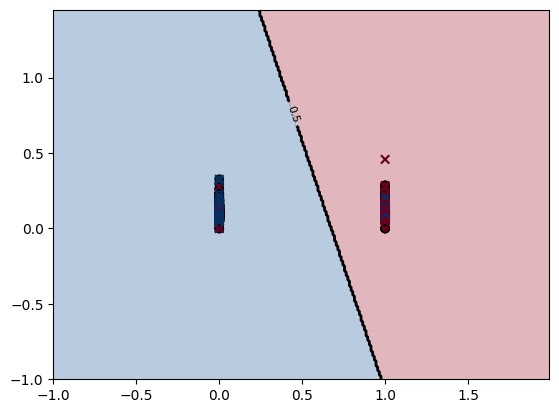

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)

plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Summary of model: only factor in data being split is profile_yn, with rel_sim_score1 having no effect. Usage of profile_yn for logistic regression is seemingly unfit. Better usage for Decision Tree (below).

##Graph 2 (rel_sim_score1 & rel_sim_score2)

Logistic Regression model, with quantities from rel_sim_score1 and rel_sim_score2.

In [ ]:
m2_x = final_df.loc[:, ['rel_sim_score1', 'rel_sim_score2']]
m2_y = final_df.loc[:, 'fraudulent']
print(m2_x)
print(m2_y)

     rel_sim_score1 rel_sim_score2
0          0.080526       0.083744
1          0.103928        0.08175
2          0.115751       0.091644
3          0.142865       0.095052
4          0.212908       0.115824
...             ...            ...
1395       0.064813        0.09481
1396       0.215824       0.084562
1397       0.090161       0.146961
1398       0.125236       0.102869
1399       0.367998        0.09802

[1400 rows x 2 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(m2_x, m2_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.48928571428571427


Displaying logistic regression model results alongside training/test data in scatterplot with matplotlib.

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-28-443a7e655034>:17: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


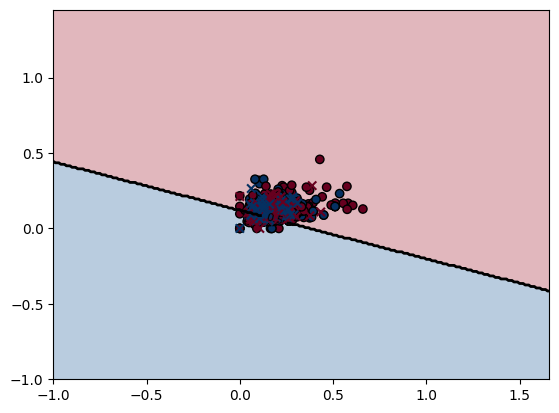

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)

plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()


Summary of model: Inconclusive division. Perhaps extracted quantities weren't as meaningful. Different data manipulation method required.

#Decision Tree

Importing Decision Tree Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

x_col = ['profile_yn', 'rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

dt1_x = final_df.loc[:, x_col]
dt1_y = final_df.loc[:, y_col]

print(dt1_x)
print(dt1_y)

      profile_yn rel_sim_score1 rel_sim_score2
0              1       0.080526       0.083744
1              0       0.103928        0.08175
2              1       0.115751       0.091644
3              1       0.142865       0.095052
4              1       0.212908       0.115824
...          ...            ...            ...
1395           1       0.064813        0.09481
1396           0       0.215824       0.084562
1397           0       0.090161       0.146961
1398           1       0.125236       0.102869
1399           0       0.367998        0.09802

[1400 rows x 3 columns]
0       0
1       0
2       0
3       0
4       0
       ..
1395    1
1396    1
1397    1
1398    1
1399    1
Name: fraudulent, Length: 1400, dtype: int64


Training Decision Tree Model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dt1_x, dt1_y, test_size=0.2)
dt1_model = DecisionTreeClassifier(max_depth=3, random_state=42)
dt1_model.fit(x_train, y_train)

print(f"acc: {accuracy_score(y_test, dt1_model.predict(x_test))}")
print(f"{classification_report(y_test, dt1_model.predict(x_test))}")

acc: 0.7178571428571429
              precision    recall  f1-score   support

           0       0.65      0.89      0.75       133
           1       0.85      0.56      0.68       147

    accuracy                           0.72       280
   macro avg       0.75      0.73      0.71       280
weighted avg       0.75      0.72      0.71       280



[Text(0.5, 0.875, 'profile_yn <= 0.5\ngini = 0.5\nsamples = 1120\nvalue = [567, 553]\nclass = true'),
 Text(0.25, 0.625, 'rel_sim_score1 <= 0.282\ngini = 0.321\nsamples = 434\nvalue = [87, 347]\nclass = false'),
 Text(0.125, 0.375, 'rel_sim_score1 <= 0.21\ngini = 0.302\nsamples = 410\nvalue = [76, 334]\nclass = false'),
 Text(0.0625, 0.125, 'gini = 0.327\nsamples = 365\nvalue = [75, 290]\nclass = false'),
 Text(0.1875, 0.125, 'gini = 0.043\nsamples = 45\nvalue = [1, 44]\nclass = false'),
 Text(0.375, 0.375, 'rel_sim_score1 <= 0.333\ngini = 0.497\nsamples = 24\nvalue = [11, 13]\nclass = false'),
 Text(0.3125, 0.125, 'gini = 0.473\nsamples = 13\nvalue = [8, 5]\nclass = true'),
 Text(0.4375, 0.125, 'gini = 0.397\nsamples = 11\nvalue = [3, 8]\nclass = false'),
 Text(0.75, 0.625, 'rel_sim_score1 <= 0.099\ngini = 0.42\nsamples = 686\nvalue = [480, 206]\nclass = true'),
 Text(0.625, 0.375, 'rel_sim_score2 <= 0.097\ngini = 0.246\nsamples = 139\nvalue = [119, 20]\nclass = true'),
 Text(0.5625, 

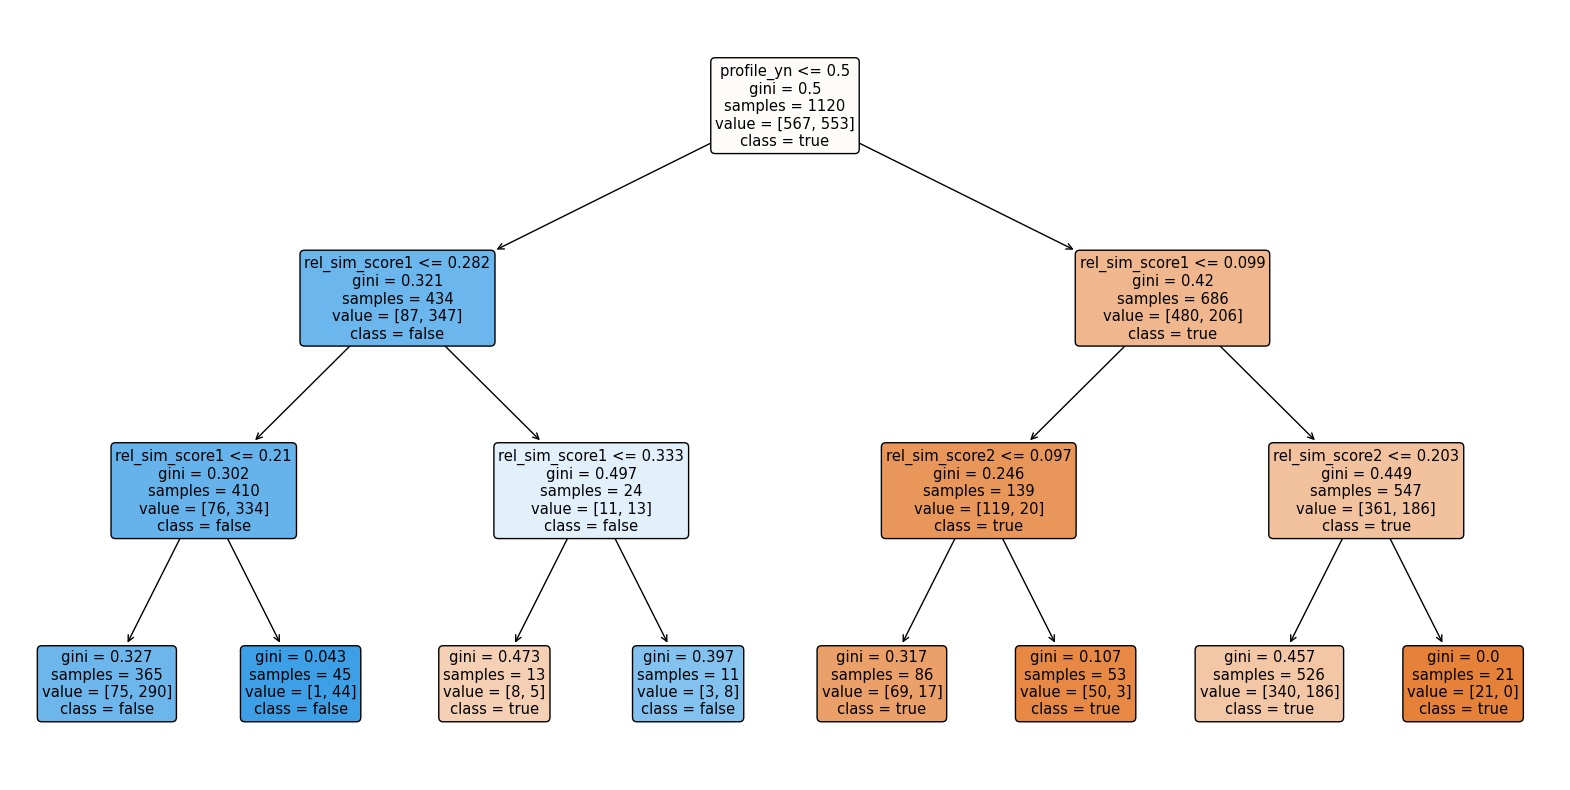

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt1_model, filled=True, feature_names=x_col, class_names=['true', 'false'], rounded=True)

Model results: Decision Tree classification is arguably pretty good.
However main factor for classification is once again profile_yn.
Idea to initially split data with profile_yn, then run logistic regression afterwards (shown below).

# Decision + Logistic Regression

(Rationale explained above)

In [ ]:
final_df_py = final_df.loc[final_df.loc[:, 'profile_yn'] == 1]
final_df_pn = final_df.loc[final_df.loc[:, 'profile_yn'] == 0]

##Profile: Y

In [ ]:
x_col = ['rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

py_x = final_df_py.loc[:, x_col]
py_y = final_df_py.loc[:, y_col]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(py_x, py_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.7341040462427746


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-80-31ae8ff92f47>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


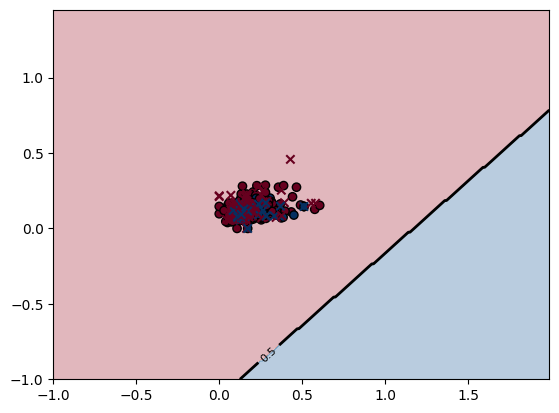

In [ ]:
x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)


plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Model results: inconclusive.

##Profile: N

In [ ]:
x_col = ['rel_sim_score1', 'rel_sim_score2']
y_col = 'fraudulent'

py_x = final_df_pn.loc[:, x_col]
py_y = final_df_pn.loc[:, y_col]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(py_x, py_y, test_size=0.2)
# x_train = x_train.values.reshape(-1,1)
log_model = LogisticRegression()
log_model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
# x_test = x_test.values.reshape(-1,1)
result = log_model.predict(x_test)

count = 0
for i in range(len(result)):
  count += result[i] == y_test.iloc[i]

print(count / len(result))

0.7685185185185185


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
<ipython-input-84-31ae8ff92f47>:15: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')


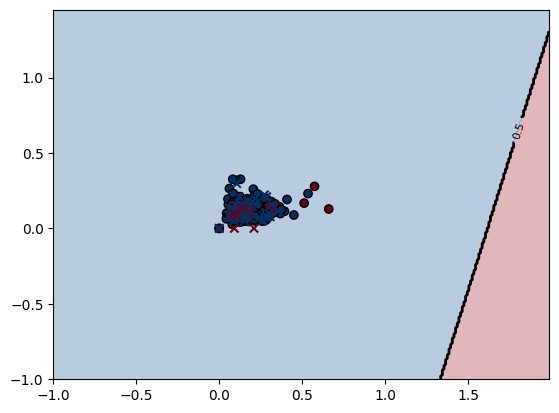

In [ ]:
x1_min, x1_max = m1_x.iloc[:, 0].min() - 1, m1_x.iloc[:, 0].max() + 1
x2_min, x2_max = m1_x.iloc[:, 1].min() - 1, m1_x.iloc[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x1_min,x1_max, 0.01), np.arange(x2_min,x2_max, 0.01))

z = log_model.predict(np.c_[xx.ravel(),yy.ravel()])
z = z.reshape(xx.shape)

contour = plt.contour(xx,yy,z,colors='black',levels=[0.5],linewidths=2)


plt.clabel(contour,inline=True,fontsize=8)
plt.contourf(xx,yy,z,cmap=plt.cm.RdBu,alpha=0.3)
plt.scatter(x_train.iloc[:,0],x_train.iloc[:,1],c=y_train,cmap=plt.cm.RdBu,edgecolors='k')
plt.scatter(x_test.iloc[:,0],x_test.iloc[:,1],c=y_test,marker='x',cmap=plt.cm.RdBu,edgecolors='k')
plt.show()

Model results: inconclusive

i want to kill myself